In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.datasets import CIFAR10
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Adjust the transforms to match DINOv2 expectations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.485, 0.456, 0.406),  # ImageNet mean
        std=(0.229, 0.224, 0.225)    # ImageNet std
    )
])

# Load the CIFAR-10 dataset

cifar10_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar10_loader = DataLoader(cifar10_dataset, batch_size=64, shuffle=False)

# Load the pretrained DINOv2 ViT-S/14 model
dinov2_vits14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14_reg')

# Remove the classification head to get features directly
#dinov2_vits14.head = nn.Identity()

# Move the model to the appropriate device
dinov2_vits14 = dinov2_vits14.to(device)
dinov2_vits14.eval()

# Extract features and labels
features_list = []
labels_list = []

print("Extracting features using DINOv2 ViT-S/14...")
with torch.no_grad():
    for images, labels in tqdm(cifar10_loader):
        images = images.to(device)
        # Extract features using the DINOv2 model
        features = dinov2_vits14(images)  # Shape: [batch_size, feature_dim]
        features = features.cpu()
        features_list.append(features)
        labels_list.append(labels)

# Concatenate all features and labels
features = torch.cat(features_list, dim=0)  # Shape: [num_samples, feature_dim]
labels = torch.cat(labels_list, dim=0)      # Shape: [num_samples]
print(features.size())
# Convert features to numpy array
features_np = features.numpy()
labels_np = labels.numpy()
np.save('cifar10dinoLembeddings.npy', features_np)
np.save('cifar10dinoLlabels.npy', labels_np)

Files already downloaded and verified


Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vitl14/dinov2_vitl14_reg4_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vitl14_reg4_pretrain.pth
100%|██████████| 1.13G/1.13G [00:04<00:00, 298MB/s]


Extracting features using DINOv2 ViT-S/14...


100%|██████████| 782/782 [26:28<00:00,  2.03s/it]

torch.Size([50000, 1024])


In [2]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters= 10, random_state=0, n_init="auto").fit(features)
kmeanslabels = kmeans.fit_predict(features)
print(adjusted_rand_score(labels, kmeanslabels))
print(adjusted_mutual_info_score(labels, kmeanslabels))

0.5975734349588491
0.8021548858912338


In [10]:
import umap
features = umap.UMAP(
    n_neighbors=50,
    min_dist=0.0,
    n_components= 256
).fit_transform(features)
kmeans= KMeans(n_clusters= 100, random_state=0, n_init="auto").fit(features)
kmeanslabels = kmeans.fit_predict(features)
print(adjusted_rand_score(labels, kmeanslabels))
print(adjusted_mutual_info_score(labels, kmeanslabels))

0.04679049352425768
0.43394779939347256


In [7]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.datasets import CIFAR100
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Adjust the transforms to match DINOv2 expectations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.485, 0.456, 0.406),  # ImageNet mean
        std=(0.229, 0.224, 0.225)    # ImageNet std
    )
])

# Load the CIFAR-10 dataset

cifar100_dataset = CIFAR100(root='./data', train=True, download=True, transform=transform)
cifar100_loader = DataLoader(cifar100_dataset, batch_size=64, shuffle=False)

# Load the pretrained DINOv2 ViT-S/14 model
dinov2_vits14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14_reg')

# Remove the classification head to get features directly
#dinov2_vits14.head = nn.Identity()

# Move the model to the appropriate device
dinov2_vits14 = dinov2_vits14.to(device)
dinov2_vits14.eval()

# Extract features and labels
features_list = []
labels_list = []

print("Extracting features using DINOv2 ViT-S/14...")
with torch.no_grad():
    for images, labels in tqdm(cifar100_loader):
        images = images.to(device)
        # Extract features using the DINOv2 model
        features = dinov2_vits14(images)  # Shape: [batch_size, feature_dim]
        features = features.cpu()
        features_list.append(features)
        labels_list.append(labels)

# Concatenate all features and labels
features = torch.cat(features_list, dim=0)  # Shape: [num_samples, feature_dim]
labels = torch.cat(labels_list, dim=0)      # Shape: [num_samples]
print(features.size())
# Convert features to numpy array
features_np = features.numpy()
labels_np = labels.numpy()
np.save('cifar100dinoLembeddings.npy', features_np)
np.save('cifar100dinoLlabels.npy', labels_np)

Files already downloaded and verified


Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main


Extracting features using DINOv2 ViT-S/14...


100%|██████████| 782/782 [26:51<00:00,  2.06s/it]

torch.Size([50000, 1024])


Processing images and extracting embeddings...
Reducing dimensions with t-SNE...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.022s...
[t-SNE] Computed neighbors for 50000 samples in 24.597s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabi

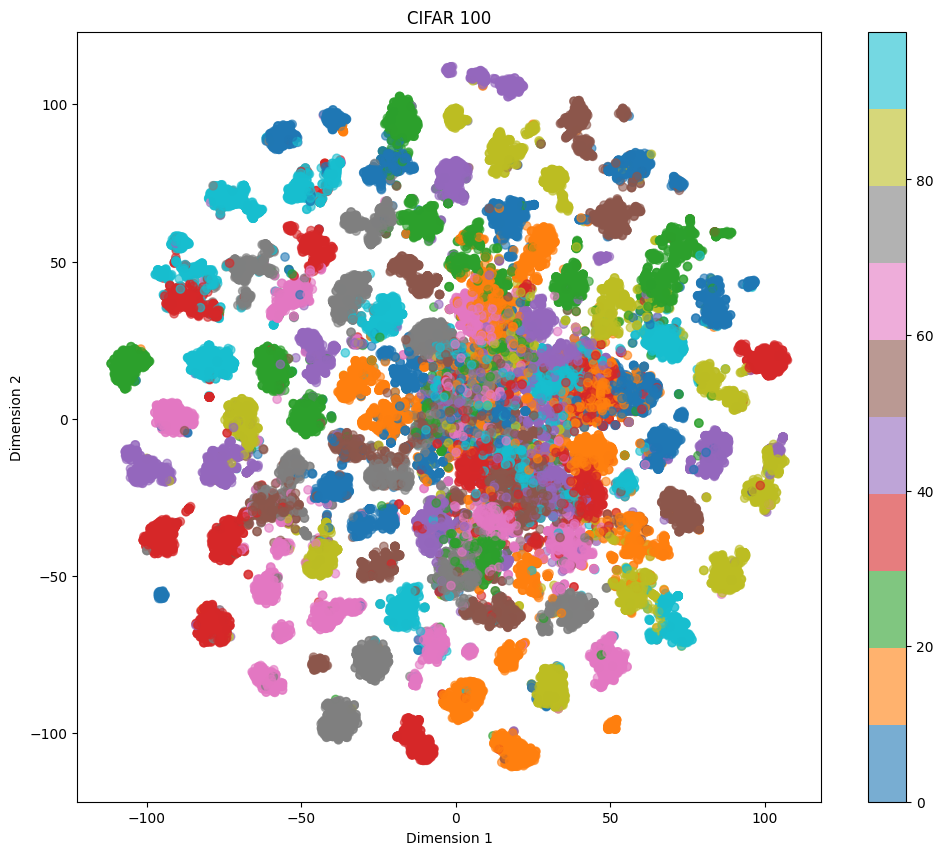

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
print("Processing images and extracting embeddings...")
print("Reducing dimensions with t-SNE...")
tsne = TSNE(n_components=2, random_state=42, verbose=1)
embeddings_2d = tsne.fit_transform(features_np)
plt.figure(figsize=(12, 10))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.colorbar()
plt.title('CIFAR 100')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [11]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters= 100, random_state=0, n_init="auto").fit(features)
kmeanslabels = kmeans.fit_predict(features)
print(adjusted_rand_score(labels, kmeanslabels))
print(adjusted_mutual_info_score(labels, kmeanslabels))

0.5965568357654111
0.8475422985341533
